In [3]:


import better 

import numpy as np

light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

class antenna:
    def __init__(self, position, angle, length, source_position, radius):
        self.position = position
        self.angle = angle
        self.length = length
        self.source_position = source_position
        self.radius = radius

delta_r = light_speed / frequency / 1e2
test = antenna(np.array([[0.0, 0.0], [0.312, 0.0], [0.447, 0.0], [0.699, 0.0], [1.050,0.0],[1.482,0.0],[1.986,0.0],[2.553,0.0],[3.168,0.0]]), 
               np.array([np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2, np.pi/2]), 
               np.array([1.038,0.955,0.956,0.932,0.916,0.906,0.897,0.891,0.887]), 
               np.array([[0.312, 0.0]]), 
               np.array([3.175e-3,3.175e-3,3.175e-3,3.175e-3,3.175e-3,3.175e-3,3.175e-3,3.175e-3,3.175e-3]))


In [4]:
import matrix_elements as calc
import geometry as gm
R_block, R = gm.calculate_positions(antenna=test, delta_r=delta_r)
impedance = calc.calculate_impedance(antenna=test, R_block=R_block, delta_r=delta_r, frequency=frequency)
incident_field = calc.calculate_field(antenna=test, R_block=R_block, driven_voltage=incident_voltage, delta_r=delta_r)
current = np.linalg.solve(impedance, incident_field)

c:\Users\lukas\OneDrive\Документы\Method-of-moment-for-antennas\MyMomVenv\Lib\site-packages\scipy\integrate\_quadpack_py.py:606: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


In [8]:
element_num = []
for i in range (len(R_block)):
    element_num.append(len(R_block[i]))
element_num = np.array(element_num)
    
num_elements = sum(element_num)
current_block = []
cum_n = np.append(0, np.cumsum(element_num))
for i in range (len(cum_n)-1):
    current_block.append(current[cum_n[i]:cum_n[i+1]])

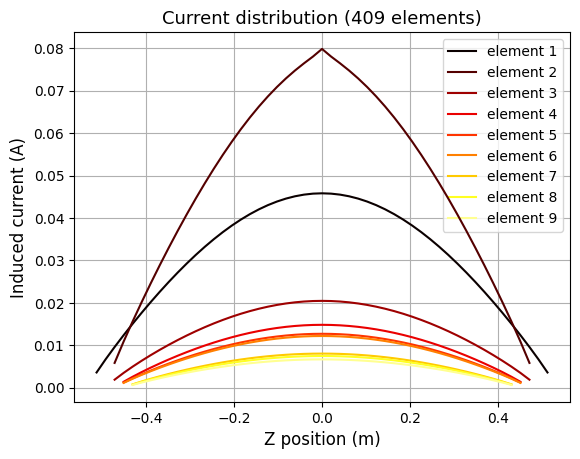

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import colormaps as cmaps
from matplotlib import colormaps as plt_cmaps
import plotly.graph_objects as go

def plot_together (R_block, element_currents) :
    cmap = plt_cmaps['hot']
    for i in range (len(R_block)):
        plt.plot(R_block[i][:,1], np.abs(element_currents[i]), zorder = np.inf, label = f'element {1+i}', color = cmap((i)/len(R_block)))

    plt.title(f"Current distribution ({sum(len(element_currents[i]) for i in range(len(element_currents)))} elements)", size = 13)
    plt.ylabel("Induced current (A)", size = 12)
    plt.xlabel("Z position (m)", size = 12)
    plt.grid(zorder = 0)
    plt.legend()
plot_together(R_block=R_block, element_currents=current_block)

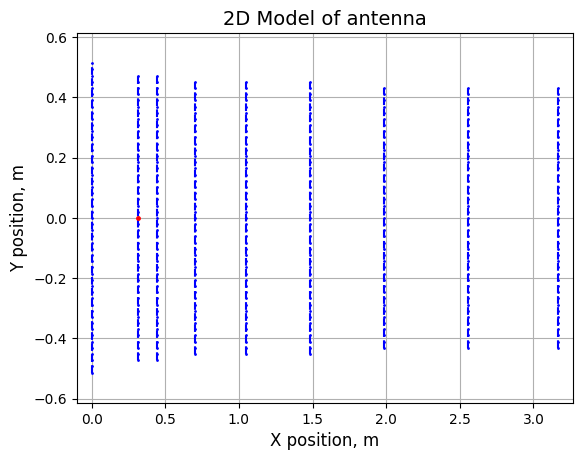

In [10]:
import geometry as gm
R_block, R = gm.calculate_positions(antenna=test, delta_r=delta_r)
gm.plot_antenna(R_block=R_block, R=R, antenna=test, delta_r=delta_r)